#notes

as shown on this notebook the five classes in the rating column are unbalanced the class four has the highest percentage on the data and any model will be implemented will be biased to this class. In addition, there are differnt ranges in the features. 

**my trials and errors:**

i tried to solve the unbalancing problem with SMOTE library but the result of the metrics got worse. and standardscalar and normalizer to solve the differnt ranges of the features but the results got worst also.

and this model got the worst results on the testing data 

#import libraries


In [1]:
import pandas as pd 
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing

In [2]:
#load train data and display the first five rows of data 
df = pd.read_csv('/content/train_new.csv')
df.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [3]:
#drop duplicates but not found any duplicated rows
df = df.drop_duplicates()
df.shape

(1094, 34)

In [4]:
#print the nuber of null at each column
print(df.isna().sum().sort_values())

price                             0
theme                             0
merchant_has_profile_picture      0
merchant_id                       0
merchant_rating                   0
merchant_rating_count             0
merchant_info_subtitle            0
merchant_title                    0
inventory_total                   0
countries_shipped_to              0
shipping_is_express               0
crawl_month                       0
shipping_option_name              0
product_variation_inventory       0
shipping_option_price             0
id                                0
tags                              0
badge_fast_shipping               0
badge_product_quality             0
badge_local_product               0
retail_price                      0
currency_buyer                    0
units_sold                        0
badges_count                      0
uses_ad_boosts                    0
rating_count                      0
rating                            0
merchant_name               

In [5]:
#drop the columns which have single value, low importance from my point of view and low correlation with target (rating)
df = df.drop(['merchant_profile_picture','merchant_title','merchant_name','theme','merchant_info_subtitle','merchant_id','badge_fast_shipping','badge_product_quality','badge_local_product','badges_count',
              'tags','shipping_option_name','origin_country','currency_buyer','inventory_total','shipping_is_express','crawl_month','urgency_text'],axis=1)

In [6]:
#print nulls after dropping words 
print(df.isna().sum().sort_values())

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
product_variation_inventory       0
shipping_option_price             0
countries_shipped_to              0
merchant_rating_count             0
merchant_rating                   0
merchant_has_profile_picture      0
id                                0
product_variation_size_id        12
product_color                    29
has_urgency_banner              745
dtype: int64


In [7]:
#print number of values in each column
df.nunique()

price                            117
retail_price                      95
units_sold                        13
uses_ad_boosts                     2
rating                             6
rating_count                     584
product_color                     87
product_variation_size_id         83
product_variation_inventory       47
shipping_option_price              8
countries_shipped_to              83
has_urgency_banner                 1
merchant_rating_count            718
merchant_rating                  742
merchant_has_profile_picture       2
id                              1094
dtype: int64

In [9]:
#replace null value at (has_urgency_banner) column with zero 
df['has_urgency_banner'] = df['has_urgency_banner'].fillna(0).astype('int64')

In [10]:
#encoding color and product_variation_size_id into numerical 
label_encoder = preprocessing.LabelEncoder()
df['product_color'] = label_encoder.fit_transform(df['product_color'])
df['product_variation_size_id'] = label_encoder.fit_transform(df['product_variation_size_id'])
df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
0,8.00,7,10000,1,4.0,1670,86,38,50,3,30,0,66644,4.137582,1,272
1,8.00,7,1000,0,4.0,843,12,37,50,3,37,0,25752,4.256873,0,1515
2,6.00,34,100,0,4.0,10,77,37,50,2,41,0,3897,3.928920,0,940
3,4.67,4,100,1,3.0,82,40,72,5,1,25,0,7497,4.079365,0,309
4,8.00,11,1000,0,4.0,127,8,43,50,3,15,1,173,4.306358,0,226


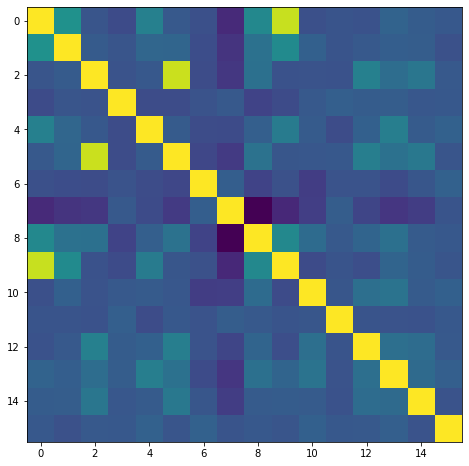

In [11]:
#heat map for features correlation
plt.figure(figsize =(8,8))
plt.imshow(df.corr())
plt.show()

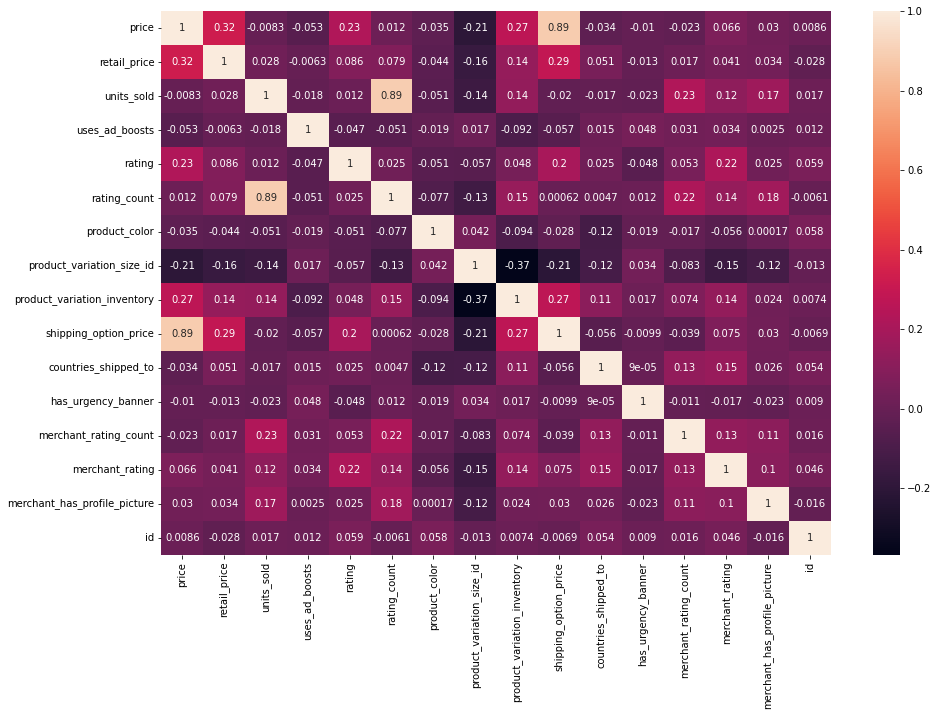

In [12]:
plt.figure(figsize =(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

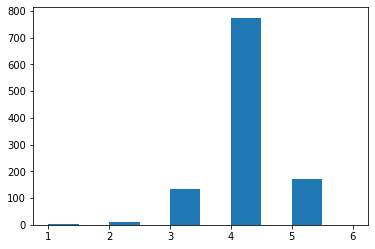

In [13]:
#check classes in the target column (rating)
plt.hist(df['rating'])
plt.show()

In [14]:
#remove the 6 class 
df = df[(df.rating == 1) | (df.rating == 2) | (df.rating == 3) | (df.rating == 4) | (df.rating == 5)]
df.shape

(1093, 16)

In [15]:
#select features(X) and target(y)
y = df.iloc[:,4]
X = df.drop(['rating'],axis=1)

#Naive Bayesian

In [16]:
model = GaussianNB(var_smoothing=1)
model.fit(X,y)

GaussianNB(var_smoothing=1)

In [18]:
#perform prediction on the train data and print confusion matrix
y_predict = model.predict(X)
conf_matrix = confusion_matrix(y,y_predict)
print(conf_matrix)

[[  0   0   0   2   0]
 [  0   0   0  12   0]
 [  0   0   0 134   1]
 [  0   0   0 767   7]
 [  0   0   0 168   2]]


In [20]:
#print classification report on train data
report = print(classification_report(y,y_predict))
print(report)

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00        12
         3.0       0.00      0.00      0.00       135
         4.0       0.71      0.99      0.83       774
         5.0       0.20      0.01      0.02       170

    accuracy                           0.70      1093
   macro avg       0.18      0.20      0.17      1093
weighted avg       0.53      0.70      0.59      1093

None


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
#generate csv file with two columnd ID and y_predicted for rating
prediction = pd.DataFrame(y_predict, columns=['rating']).to_csv('NB_sample_submission.csv',index=False)
df = pd.read_csv('NB_sample_submission.csv')

test = pd.read_csv("test_new.csv")
df['id']=test['id']

df_pred = df.reindex(columns=['id','rating'])
df_pred.to_csv('NB_sample_submission.csv',index=False)